In [1]:
#Modelo AR para pronosticar el INPC General
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
#Todos los títulos en times new roman
plt.rc('font', family='Times New Roman')


In [2]:
# Leer los datos
df = pd.read_excel('IPC.xlsx', sheet_name='IPC', index_col= 'fecha',parse_dates=['fecha'])




In [3]:
# Verificar la estacionariedad de la serie
def check_stationarity(df):
    result = sm.tsa.adfuller(df)
    print('ADF Statistic: {:.3f}'.format(result[0]))
    print('p-value: {:.3f}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.3f}'.format(key, value))
        
check_stationarity(df['ipc'])



ADF Statistic: 1.108
p-value: 0.995
Critical Values:
	1%: -3.447
	5%: -2.869
	10%: -2.571


In [4]:
# Seleccionar el orden del modelo AR utilizando AIC y BIC
order_aic = sm.tsa.arma_order_select_ic(df['ipc'], ic='aic')['aic_min_order']
order_bic = sm.tsa.arma_order_select_ic(df['ipc'], ic='bic')['bic_min_order']

print("Orden del modelo AR (AIC):", order_aic)
print("Orden del modelo AR (BIC):", order_bic)



C:\Users\Erik Rosas\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Erik Rosas\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Erik Rosas\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Erik Rosas\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autor

Orden del modelo AR (AIC): (3, 2)
Orden del modelo AR (BIC): (2, 0)


In [3]:
# Ajustar el modelo AR seleccionado
modelo_ar = AutoReg(df['ipc'][:'2021'],lags = [3])
modelo_ar_entrenado = modelo_ar.fit()  # Usamos el orden AIC para ajustar el modelo



C:\Users\Erik Rosas\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [4]:
#Verificamos los detalles del modelo
print(modelo_ar_entrenado.summary())

                            AutoReg Model Results                             
Dep. Variable:                    ipc   No. Observations:                  396
Model:              Restr. AutoReg(3)   Log Likelihood                -398.471
Method:               Conditional MLE   S.D. of innovations              0.667
Date:                Sun, 11 Jun 2023   AIC                            802.941
Time:                        13:14:57   BIC                            814.863
Sample:                    04-30-1989   HQIC                           807.666
                         - 12-31-2021                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6539      0.070      9.341      0.000       0.517       0.791
ipc.L3         1.0033      0.001    931.757      0.000       1.001       1.005
                                    Roots           

In [5]:
start_date = pd.to_datetime('2022-01-31')
end_date = pd.to_datetime('2022-12-31')
forecast = modelo_ar_entrenado.predict(start=start_date, end=end_date)


C:\Users\Erik Rosas\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [6]:
forecast=  pd.DataFrame({'fecha': forecast.index, 'ipc': forecast.values})
forecast.set_index(['fecha'], inplace=True)

In [7]:
from sklearn.metrics import mean_squared_error
test_data=pd.DataFrame(df['ipc']['2022-01':'2022-12'])
mse = mean_squared_error(test_data, forecast)
print('El MSE de la predicción es:', mse)

El MSE de la predicción es: 13.163092626681077


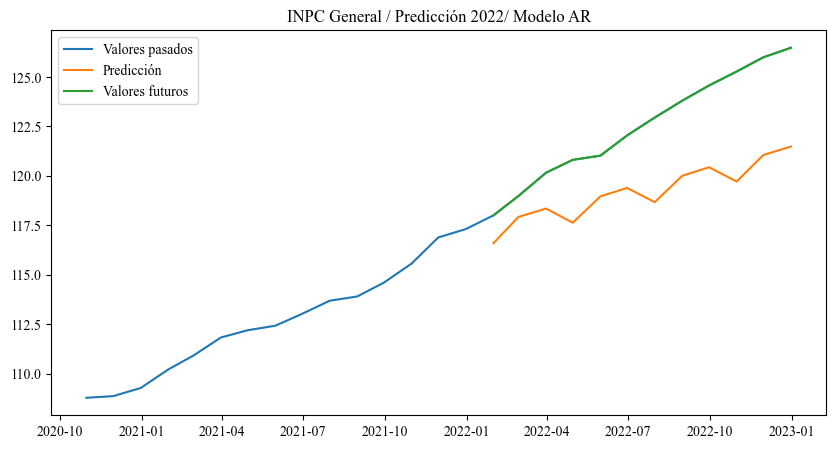

In [8]:
plt.figure(figsize=(10, 5))

item_id = "ipc"
y_past = df[item_id]
y_pred = forecast[item_id]['2022':]
y_test = test_data[item_id]['2022-01':'2022-12']

plt.plot(y_past['2020-10':'2022'], label="Valores pasados")
plt.plot(y_pred, label="Predicción")
plt.plot(y_test, label="Valores futuros")
plt.title('INPC General / Predicción 2022/ Modelo AR')

plt.legend();

In [15]:
# Ajustar el modelo AR seleccionado
modelo_ar1 = AutoReg(df['ipc'][:'2007'],lags = [3])
modelo_ar_entrenado1 = modelo_ar1.fit()  # Usamos el orden AIC para ajustar el modelo



C:\Users\Erik Rosas\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [16]:
#pronosticamos 2008
start_date = pd.to_datetime('2008-01-31')
end_date = pd.to_datetime('2008-12-31')
forecast1 = modelo_ar_entrenado1.predict(start=start_date, end=end_date)
forecast1=  pd.DataFrame({'fecha': forecast1.index, 'ipc': forecast1.values})
forecast1.set_index(['fecha'], inplace=True)

C:\Users\Erik Rosas\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [17]:
from sklearn.metrics import mean_squared_error
test_data1=pd.DataFrame(df['ipc']['2008-01':'2008-12'])
mse = mean_squared_error(test_data1, forecast1)
print('El MSE de la predicción es:', mse)

El MSE de la predicción es: 0.1963642813216644


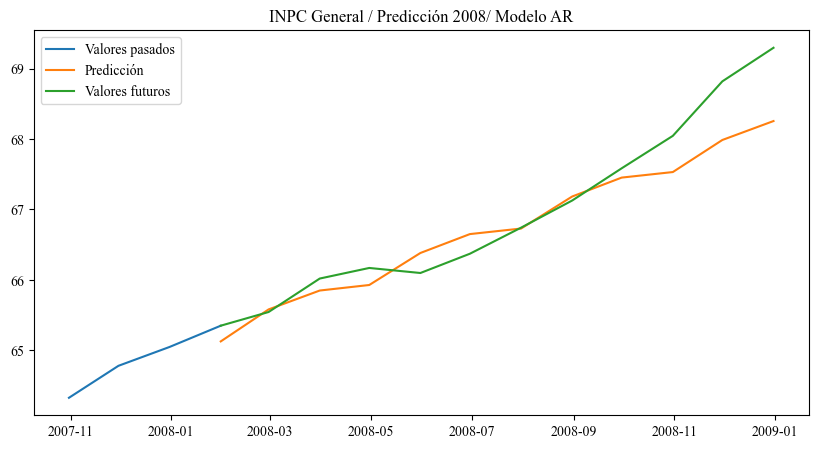

In [18]:
plt.figure(figsize=(10, 5))

item_id = "ipc"
y_past = df[item_id]['2007-10':'2008-1']
y_pred = forecast1[item_id]['2008':]
y_test = test_data1[item_id]

plt.plot(y_past, label="Valores pasados")
plt.plot(y_pred, label="Predicción")
plt.plot(y_test, label="Valores futuros")
plt.title('INPC General / Predicción 2008/ Modelo AR')

plt.legend();

In [12]:
#Pronosticamos la serie completa
start_date = pd.to_datetime('1989-04-30')
end_date = pd.to_datetime('2022-12')
forecast2 = modelo_ar_entrenado.predict(start=start_date, end=end_date)
forecast2=  pd.DataFrame({'fecha': forecast2.index, 'ipc': forecast2.values})
forecast2.set_index(['fecha'], inplace=True)

C:\Users\Erik Rosas\anaconda3\envs\ag\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [13]:
from sklearn.metrics import mean_squared_error
test_data2=pd.DataFrame(df['ipc']['1989-04-30':'2022-12'])
mse = mean_squared_error(test_data2, forecast2)
print('El MSE de la predicción es:', mse)

El MSE de la predicción es: 0.8216788014868385


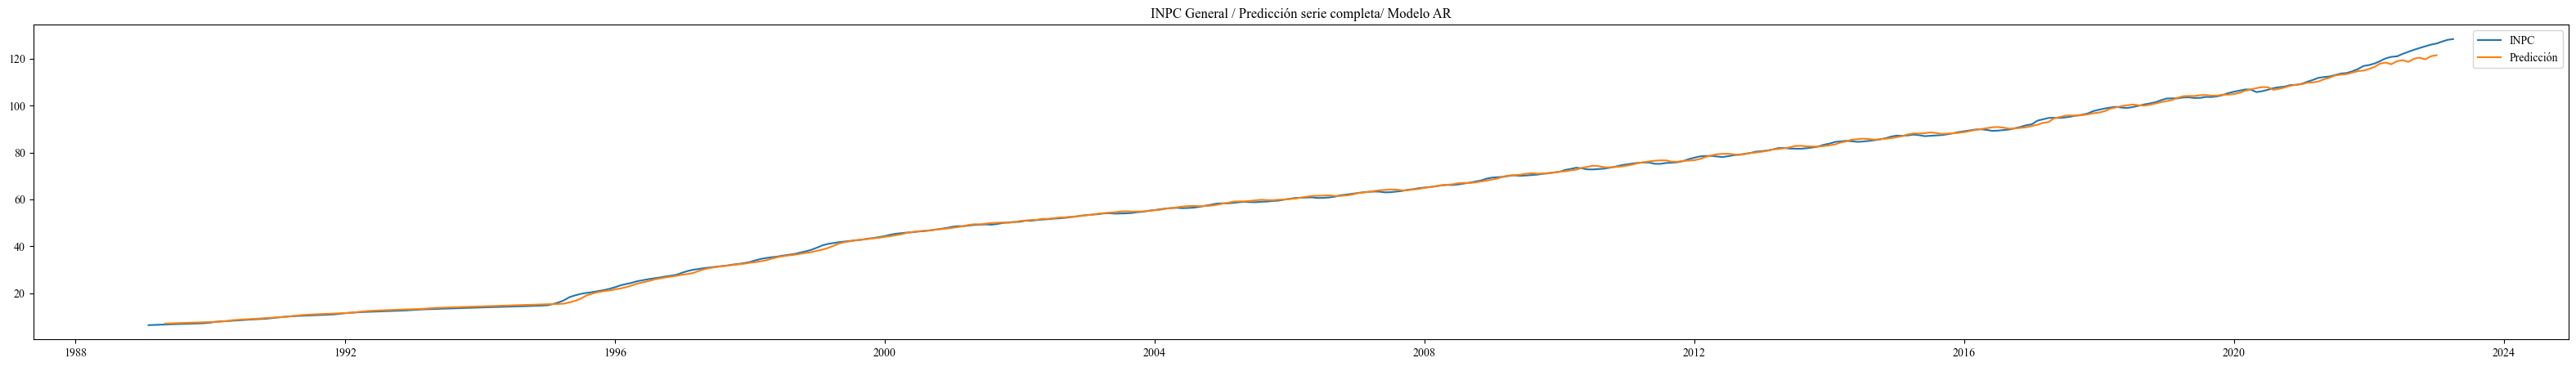

In [14]:
plt.figure(figsize=(40, 5))

item_id = "ipc"
y_past = df[item_id]
y_pred = forecast2[item_id]

plt.plot(y_past, label="INPC")
plt.plot(y_pred, label="Predicción")
plt.title('INPC General / Predicción serie completa/ Modelo AR')

plt.legend();